# 原始交易数据 VS 附加指标

## 测试环境

* Intel Core i5-6500 3.2-GHz
* 8.00GB

## 测试内容

In [1]:
import jupyter_helper
from keras.backend import clear_session
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
report={}
report['kind']=[]
report['acc']=[]
window=5
days=1

### 原始交易数据

In [3]:
h = jupyter_helper.do(
    window=window,
    days=days,
    wrapper=jupyter_helper.wrapper(),
    norm=jupyter_helper.normalize())

Instructions for updating:
Colocations handled automatically by placer.


QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


QUANTAXIS>> From C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            72192     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 203,905
Trainable params: 203,905
Non-trainable params: 0
_________________________________________________________________


Net time using :  61.47894096374512  secs.
502/502 [==============================] - ETA:  - ETA:  - 0s 139us/step
Score:
loss:0.001016727850199176
mean_absolute_error:0.02496723316431758
acc:0.00398406374501992


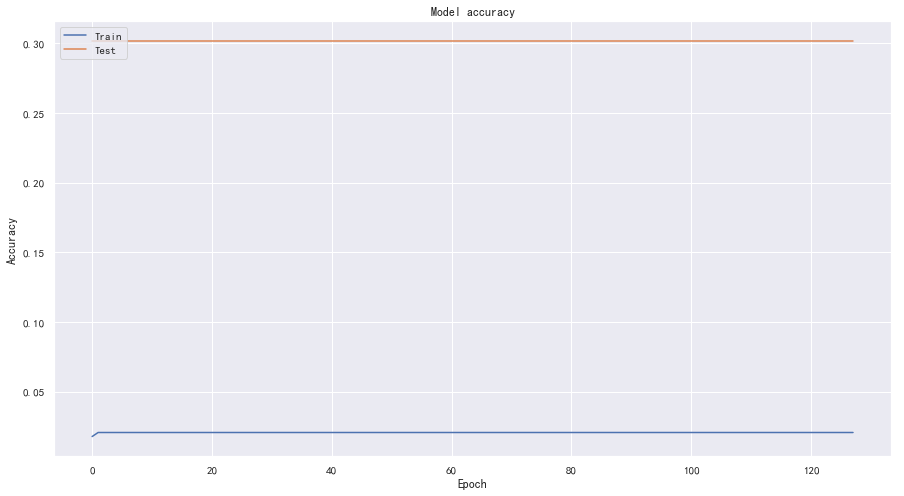

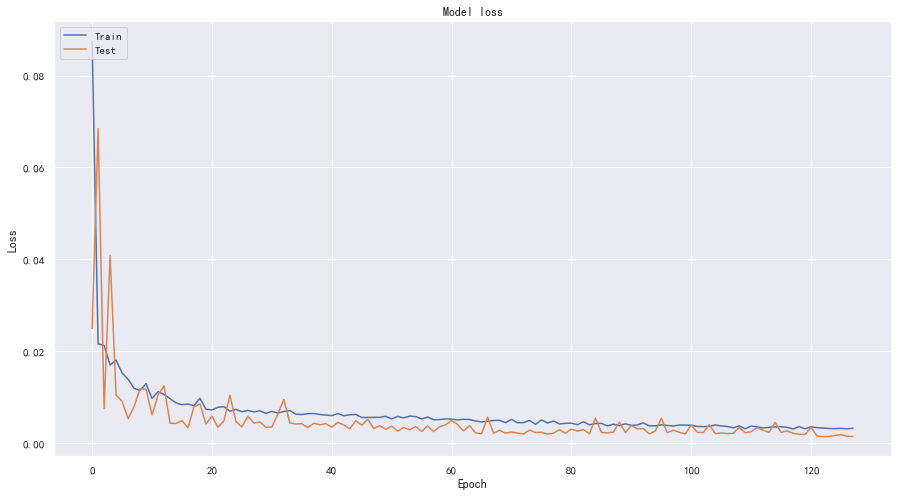

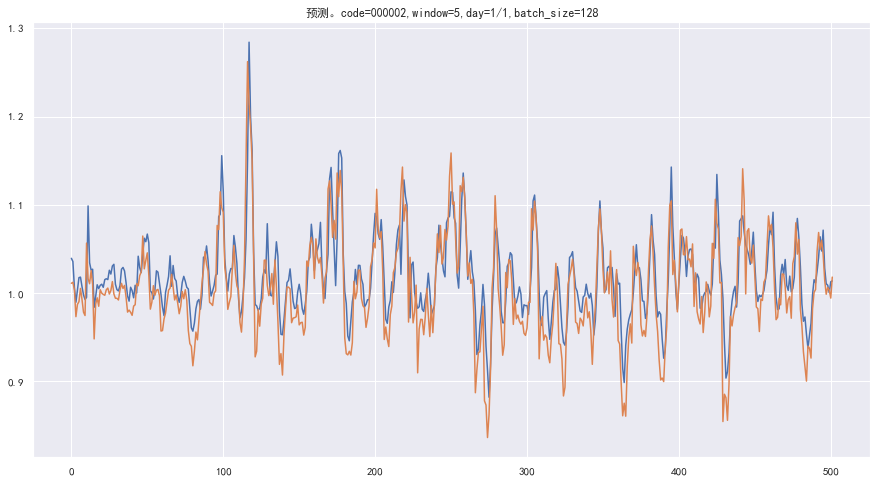

C:\Users\GuQiang\AppData\Local\conda\conda\envs\finance35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


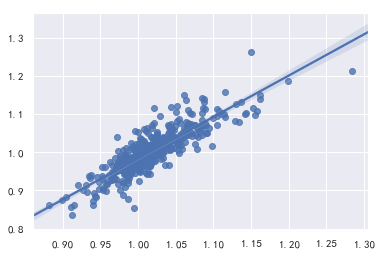

Slope Day1:1.0843311019734598


In [4]:
s=jupyter_helper.show_history(h)

In [5]:
report['kind'].append('原始指标')
# report['batch_size'].append(h['batch_size'])
# report['window'].append(h['window'])
# report['time(secs)'].append(h['end']-h['start'])
# report['time/step(us)'].append('5')
# report['loss'].append(s['score'][0])
# report['mean_absolute_error'].append(s['score'][1])
report['acc'].append(s['score'][2])
# report['slope'].append(s['slope'][0])

#### 准确率

In [6]:
s['score'][2]

0.00398406374501992

In [7]:
clear_session()

### 附加其他指标

In [8]:
h = jupyter_helper.do(
    window=window,
    days=days,
    wrapper=jupyter_helper.wrapper_CCI(),
    norm=jupyter_helper.normalize_CCI())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            81920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 213,633
Trainable params: 213,633
Non-trainable params: 0
_________________________________________________________________


Net time using :  55.155927658081055  secs.
499/499 [==============================] - ETA:  - ETA:  - 0s 144us/step
Score:
loss:0.0011616384809769555
mean_absolute_error:0.025573921559718184
acc:0.004008016032064128


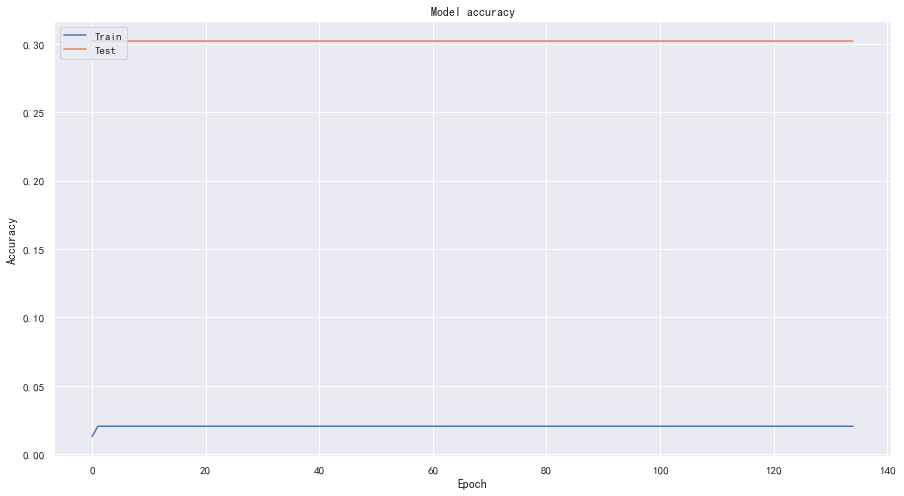

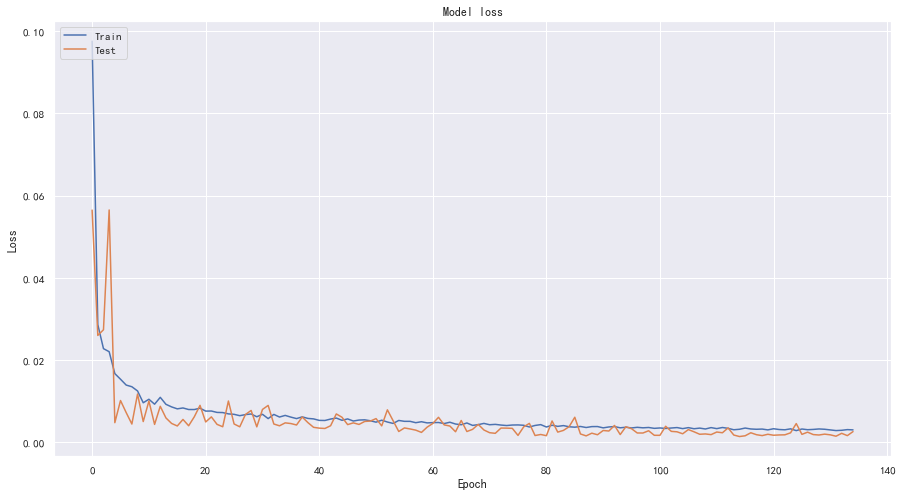

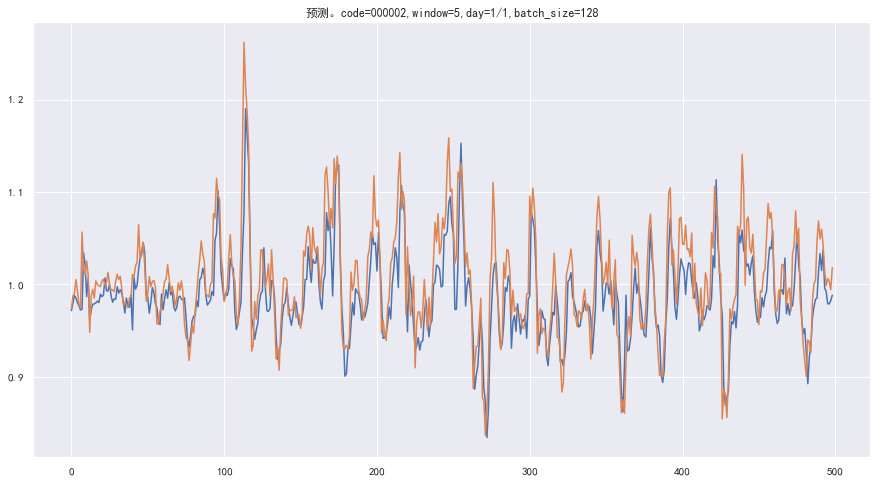

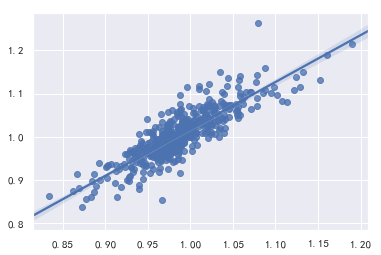

Slope Day1:1.0845025384168459


In [9]:
s=jupyter_helper.show_history(h)

In [10]:
report['kind'].append('附加其他技术指标')
# report['batch_size'].append(h['batch_size'])
# report['window'].append(h['window'])
# report['time(secs)'].append(h['end']-h['start'])
# report['time/step(us)'].append('5')
# report['loss'].append(s['score'][0])
# report['mean_absolute_error'].append(s['score'][1])
report['acc'].append(s['score'][2])
# report['slope'].append(s['slope'][0])

#### 准确率

In [11]:
s['score'][2]

0.004008016032064128

## 报告

In [14]:
pd.DataFrame(report,columns=['kind','acc']).set_index('kind').sort_values('acc',ascending=False)

,acc
kind,
附加其他技术指标,0.004008
原始指标,0.003984
